# 데이터 불러오기

In [1]:
import os

import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils

In [2]:
data_set = tf.keras.utils.get_file(
      fname="imdb.tar.gz", 
      origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", 
      extract=True)

84125825/84125825 [==============================] - 10s 0us/step


In [3]:
def data(directory):
    pos_df = directory_data(os.path.join(directory, "pos"))
    neg_df = directory_data(os.path.join(directory, "neg"))
    pos_df["sentiment"] = 1
    neg_df["sentiment"] = 0
    
    return pd.concat([pos_df, neg_df])

In [4]:
def directory_data(directory):
    data = {}
    data["review"] = []
    for file_path in os.listdir(directory):
        with open(os.path.join(directory, file_path), "r", encoding='utf-8') as file:
            data["review"].append(file.read())
            
    return pd.DataFrame.from_dict(data)

In [5]:
train_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "train"))
test_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "test"))

In [6]:
train_df.head()

,review,sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


In [7]:
reviews = list(train_df['review'])

# 데이터 분석

In [8]:
# 문자열 문장 리스트를 토크나이즈
tokenized_reviews = [r.split() for r in reviews]

In [9]:
# 토크나이즈 된 리스트에 대한 각 길이를 저장
review_len_by_token = [len(t) for t in tokenized_reviews]

In [10]:
# 토크나이즈 된 것을 붙여서 음절의 길이를 저장
review_len_by_eumjeol = [len(s.replace(' ', '')) for s in reviews]

Text(0, 0.5, 'Number of Reviews')

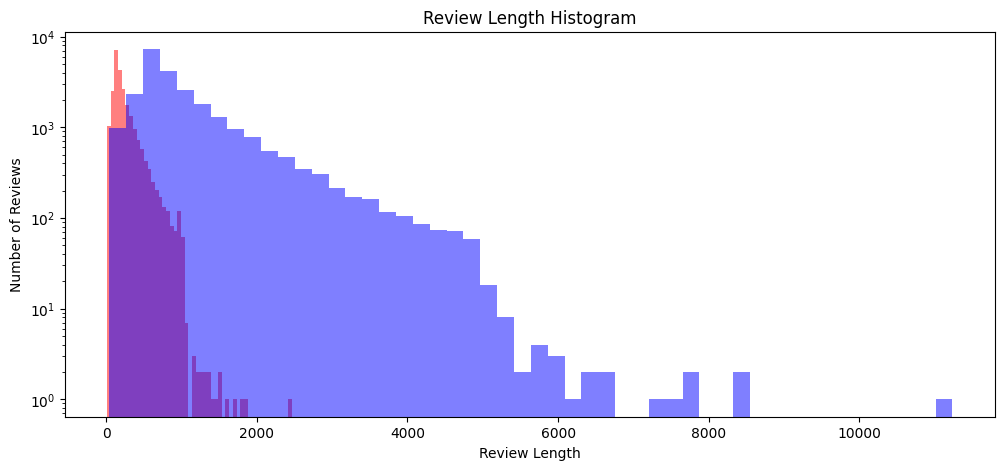

In [13]:
import matplotlib.pyplot as plt

# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(review_len_by_token, bins=50, alpha=0.5, color= 'r', label='word')
plt.hist(review_len_by_eumjeol, bins=50, alpha=0.5, color='b', label='alphabet')
plt.yscale('log'
        #    nonposy='clip'
           )
# 그래프 제목
plt.title('Review Length Histogram')
# 그래프 x 축 라벨
plt.xlabel('Review Length')
# 그래프 y 축 라벨
plt.ylabel('Number of Reviews')

In [14]:
import numpy as np

print('문장 최대길이: {}'.format(np.max(review_len_by_token)))
print('문장 최소길이: {}'.format(np.min(review_len_by_token)))
print('문장 평균길이: {:.2f}'.format(np.mean(review_len_by_token)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(review_len_by_token)))
print('문장 중간길이: {}'.format(np.median(review_len_by_token)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 길이: {}'.format(np.percentile(review_len_by_token, 25)))
print('제 3 사분위 길이: {}'.format(np.percentile(review_len_by_token, 75)))

문장 최대길이: 2470
문장 최소길이: 10
문장 평균길이: 233.79
문장 길이 표준편차: 173.73
문장 중간길이: 174.0
제 1 사분위 길이: 127.0
제 3 사분위 길이: 284.0


C:\Users\acy\AppData\Local\Temp\ipykernel_9100\2753113722.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([review_len_by_token],


{'whiskers': [<matplotlib.lines.Line2D at 0x1e2b4fcf8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e2b4fbcc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e2b4f87c50>],
 'medians': [<matplotlib.lines.Line2D at 0x1e2b4fbde90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e2b4fbeed0>],
 'means': [<matplotlib.lines.Line2D at 0x1e2b4fbe710>]}

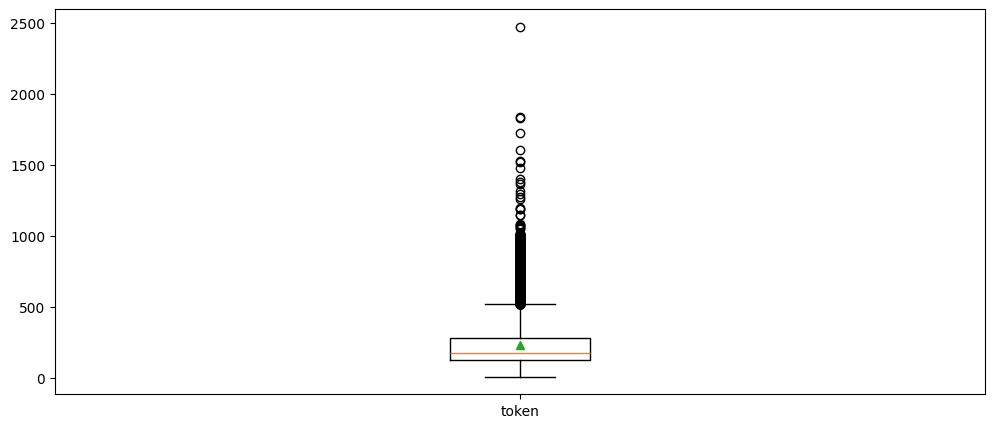

In [15]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([review_len_by_token],
             labels=['token'],
             showmeans=True)

C:\Users\acy\AppData\Local\Temp\ipykernel_9100\1014500553.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([review_len_by_eumjeol],


{'whiskers': [<matplotlib.lines.Line2D at 0x1e2b500c590>,
 'caps': [<matplotlib.lines.Line2D at 0x1e2b518cad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e2b4f75410>],
 'medians': [<matplotlib.lines.Line2D at 0x1e2b518dc90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e2b518d190>],
 'means': [<matplotlib.lines.Line2D at 0x1e2b518e550>]}

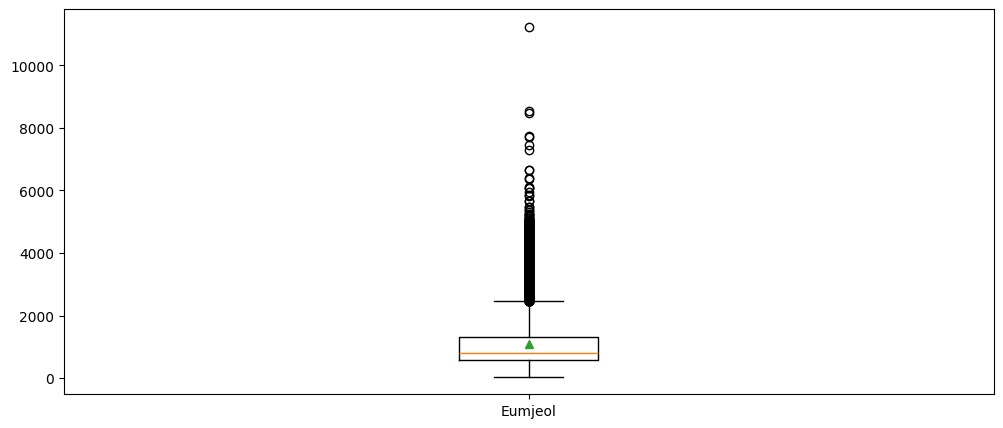

In [16]:
plt.figure(figsize=(12, 5))
plt.boxplot([review_len_by_eumjeol],
             labels=['Eumjeol'], 
             showmeans=True)

# 워드 클라우드

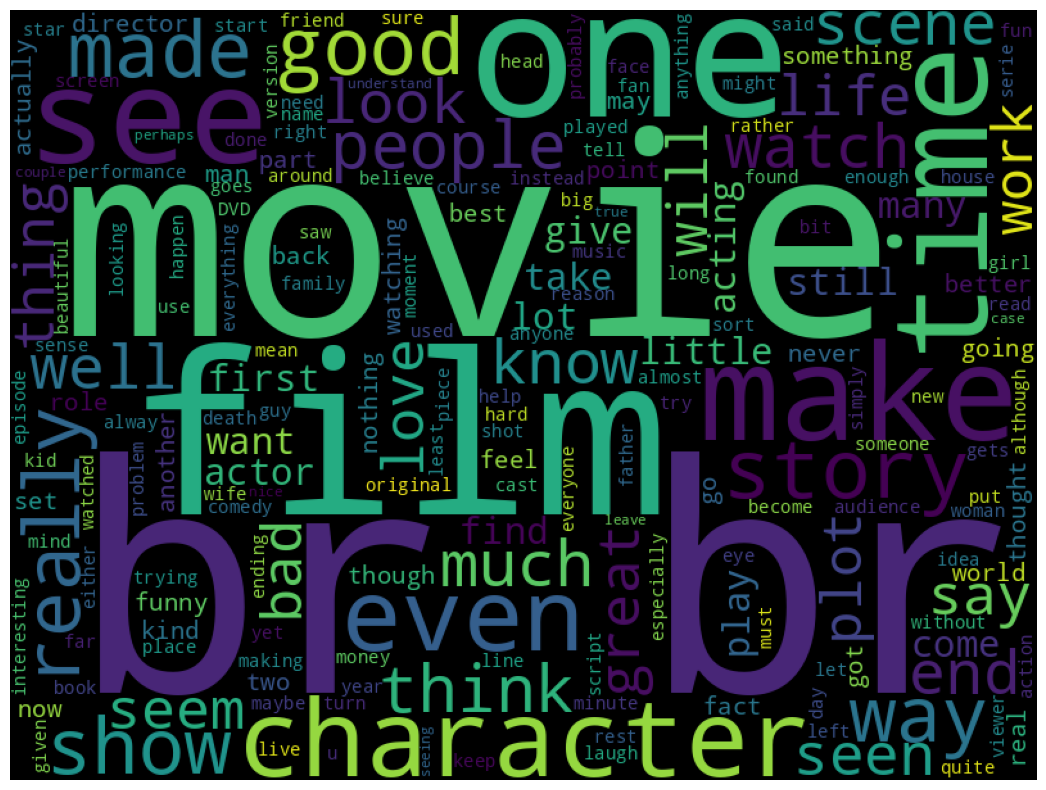

In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(stopwords = STOPWORDS,
                      background_color = 'black', width = 800,
                      height = 600).generate(' '.join(train_df['review']))
# WordCloud 텍스트 데이터를 시각화하는 플롯
# 단어의 빈도나 중요도를 시각적으로 표현

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 긍정 부정 분포

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment = train_df['sentiment'].value_counts()
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_df['sentiment'])

<Axes: ylabel='count'>